## Day 32 Lecture 1 Assignment

In this assignment, we will learn about K nearest neighbor regression. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

The meaning of the different columns can be found here: https://www.kaggle.com/tonypriyanka2913/employee-absenteeism

In [60]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [61]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [62]:
absent.shape

(740, 21)

In [63]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


Find which variables have the highest pairwise correlation and remove them from our dataset. Additionally, try to think of which variables are correlated by looking at the column names and remove those columns as well.

Note: When choosing between two categorical variables that are correlated, you often want to keep the one with fewer unique values. Why might that be? (Think about the cons of KNN.)

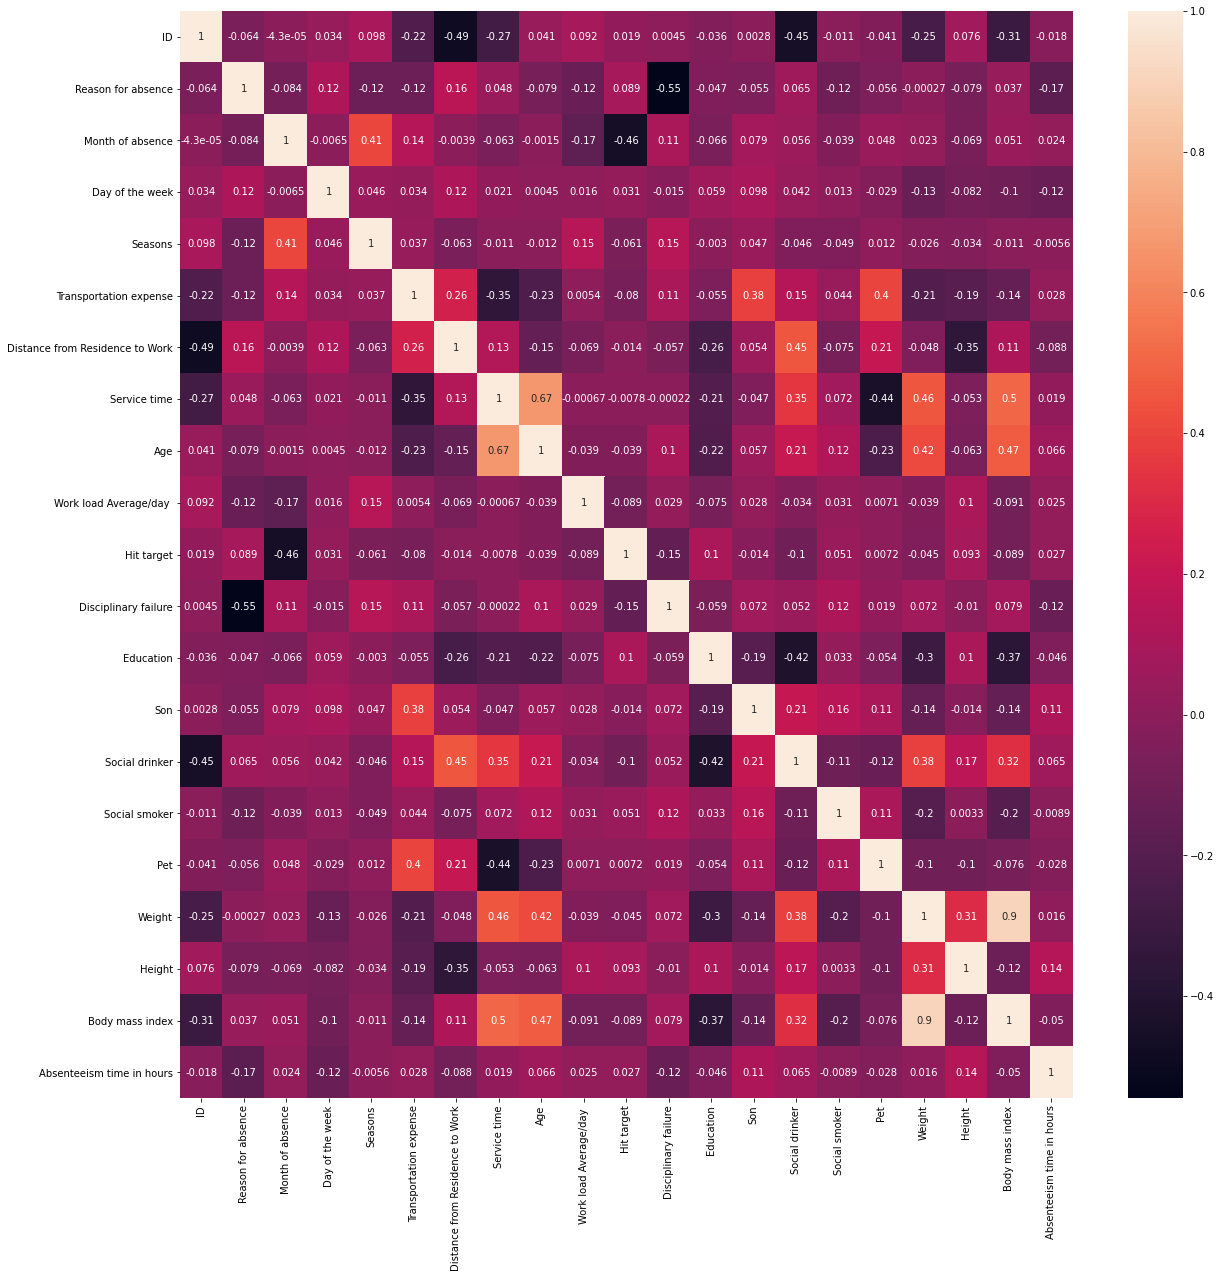

In [64]:
# answer below:
import seaborn as sns
plt.subplots(figsize=(20, 20))
sns.heatmap(absent.corr(),annot=True)
plt.show()


In [65]:
print(absent['Body mass index'].nunique())
print(absent['Weight'].nunique())

17
26


In [66]:
absent = absent.drop(['Weight','Social smoker','Seasons','Day of the week','Body mass index'],axis=1)
absent

,ID,Reason for absence,Month of absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Pet,Height,Absenteeism time in hours
0,11,26,7,289,36,13,33,239.554,97,0,1,2,1,1,172,4
1,36,0,7,118,13,18,50,239.554,97,1,1,1,1,0,178,0
2,3,23,7,179,51,18,38,239.554,97,0,1,0,1,0,170,2
3,7,7,7,279,5,14,39,239.554,97,0,1,2,1,0,168,4
4,11,23,7,289,36,13,33,239.554,97,0,1,2,1,1,172,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,289,36,13,33,264.604,93,0,1,2,1,1,172,8
736,1,11,7,235,11,14,37,264.604,93,0,3,1,0,1,172,4
737,4,0,0,118,14,13,40,271.219,95,0,1,1,1,8,170,0
738,8,0,0,231,35,14,39,271.219,95,0,1,2,1,2,170,0


Figure out which columns actually contain sneaky categorical variables and turn those into dummy variables.

In [67]:
absent['Education'].nunique()

4

In [68]:
edu = pd.get_dummies(absent['Education'])
education_list = ['high school', 'graduate', 'postgraduate', 'master and doctor']
i=0
for x in education_list:
  absent[x] = edu.iloc[:, i]
  i = i + 1
absent = absent.drop('Education',axis=1)
absent

,ID,Reason for absence,Month of absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Social drinker,Pet,Height,Absenteeism time in hours,high school,graduate,postgraduate,master and doctor
0,11,26,7,289,36,13,33,239.554,97,0,2,1,1,172,4,1,0,0,0
1,36,0,7,118,13,18,50,239.554,97,1,1,1,0,178,0,1,0,0,0
2,3,23,7,179,51,18,38,239.554,97,0,0,1,0,170,2,1,0,0,0
3,7,7,7,279,5,14,39,239.554,97,0,2,1,0,168,4,1,0,0,0
4,11,23,7,289,36,13,33,239.554,97,0,2,1,1,172,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,289,36,13,33,264.604,93,0,2,1,1,172,8,1,0,0,0
736,1,11,7,235,11,14,37,264.604,93,0,1,0,1,172,4,0,0,1,0
737,4,0,0,118,14,13,40,271.219,95,0,1,1,8,170,0,1,0,0,0
738,8,0,0,231,35,14,39,271.219,95,0,2,1,2,170,0,1,0,0,0


Split the data into train and test with test containing 20% of the data, then scale your features.

In [69]:
# answer below:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
y = absent['Absenteeism time in hours']
X = absent.drop('Absenteeism time in hours', axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)


Train a series of KNN regression models with a range of K values. For each K value, use cross validation of the training set and find the average RMSE score. Make a plot of K versus average RMSE. What is the best value of K?

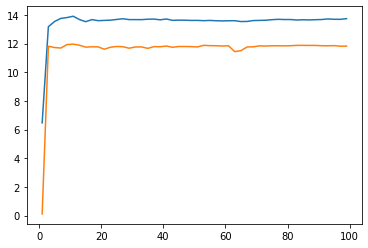

In [82]:
# answer below
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
import math
k = []
rmse = []
k_list = range(1, 101, 2)
for x in k_list:
  knn = KNeighborsClassifier(n_neighbors = x)
  knn.fit(X_train_scale,y_train)
  rms = math.sqrt(mean_squared_error(y_train, knn.predict(X_train_scale)))
  k.append(x)
  rmse.append(rms)
rmse1 = []
for x in k_list:
  knn = KNeighborsClassifier(n_neighbors = x)
  knn.fit(X_test_scale,y_test)
  rms = math.sqrt(mean_squared_error(y_test, knn.predict(X_test_scale)))
  rmse1.append(rms)
plt.plot(k,rmse)
plt.plot(k,rmse1)

In [83]:
from operator import itemgetter
index = min(enumerate(rmse), key=itemgetter(1))[0] 
k_best = k[index]
k_best

1

Using your best K, fit a model to all your training data and show the RMSE for the training and testing sets.

In [84]:
# answer below
knn = KNeighborsClassifier(n_neighbors=k_best)
knn.fit(X_train_scale,y_train)
rms1 = math.sqrt(mean_squared_error(y_train, knn.predict(X_train)))
rms2 = math.sqrt(mean_squared_error(y_test, knn.predict(X_test)))
print('Train rmse: ', rms1)
print('Test rmse: ', rms2)

Train rmse:  15.213125556215894
Test rmse:  12.500810784515949


Create a homoscedasticity plot (also called residual plot). How is your model performing? What ideas do you have to improve the model?

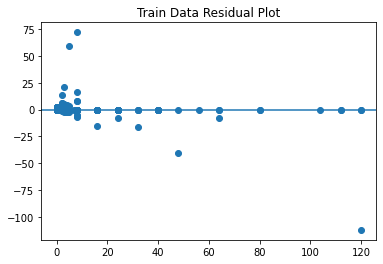

In [88]:
residual = y_train - knn.predict(X_train_scale)
plt.scatter(knn.predict(X_train_scale),residual)
plt.title('Train Data Residual Plot')
plt.axhline(y=0)
plt.show()
